**ogs@jupyter-lab: C process: Thermal Tracer Diffusion**

<!--- ![tu-dresden-blue.png](attachment:tu-dresden-blue.png) --->
<!--- <img src="ogs-workflows.png" alt="drawing" width="300"/> --->
<img src="icross-logo-ok.png" alt="drawing" width="100"/>

**Running ogs using [ogs6py](https://github.com/joergbuchwald/ogs6py)**

In [7]:
from ogs6py import ogs
#run ogs
PATH_OGS="/home/ok/ogs/build/release/bin/"
print("===============")
print(">>> run ogs <<<")
model = ogs.OGS(PROJECT_FILE="TemperatureField.prj")
model.run_model(path=PATH_OGS,LOGFILE="console.log")

>>> run ogs <<<
OGS finished with project file TemperatureField.prj.
Execution took 0.35474085807800293 s


**Extracting results using [VTUInterface](https://github.com/joergbuchwald/VTUinterface)**

>>> print results <<<
TemperatureField.pvd


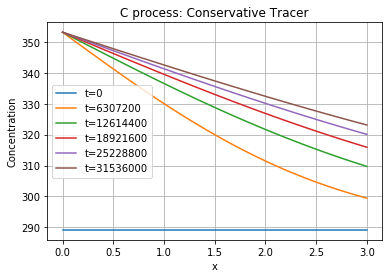

In [8]:
# read and process (point interpolation) vtu- and pvd-files 
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
print("=====================")
print(">>> print results <<<")
pvdfile=vtuIO.PVDIO("TemperatureField.pvd", dim=1)
# define xaxis and diagonal (list)
xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=3, num=100)]
r_x = np.array(xaxis)[:,0]
# define timestep
time = [0,6307200,12614400,18921600,25228800,31536000]
# read and interpolate from vtu-files listed in pvd
for t in time:
    function_xaxis_t = pvdfile.read_point_set_data(t, 'T', pointsetarray=xaxis)
    plt.plot(r_x, function_xaxis_t, label='t='+str(t))
# plot formatting
titlestring="C process: Conservative Tracer"
plt.title(titlestring)
#plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
plt.savefig("profile.png")
plt.show()

In [9]:
import time
print(time.ctime())

Thu Jul 22 16:05:17 2021


**Results have been shown using [matplotlib](https://matplotlib.org/)**

**OGS links**
- description: #https://www.opengeosys.org/docs/benchmarks/
- project file: https://gitlab.opengeosys.org/garibay-j/ogs/-/tree/TracerThermalDiffusion
- notebook draft: https://github.com/OlafKolditz/ogs-jupyter-lab

**Credits**
- Jaime Garibay Rodriguez for this benchmark set up
- Jörg Buchwald for ogs6py and VTUInterface (https://joss.theoj.org/papers/6ddcac13634c6373e6e808952fdf4abc)